In [386]:
import numpy as np
import math
import matplotlib.pyplot as plt
from functools import partial
from matplotlib.animation import FuncAnimation

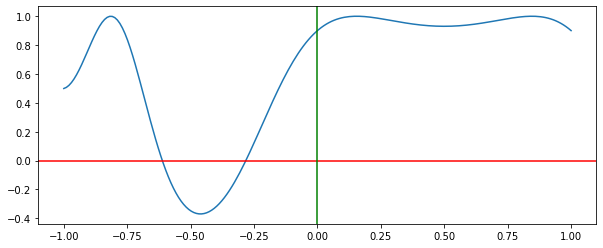

In [402]:
facttable = [math.factorial(x) for x in range(0, 100)]
# for fast factorial calculation


def factorial(x):
    return facttable[x]

#  evaluate an Associated Legendre Polynomial P(l,m,x) at x 
def P(l, m, x):    
    pmm = 1.0
    somx2 = math.sqrt((1.0 - x) * (1.0 + x))
    fact = 1.0

    for i in range(1, m+1):  # (int i=1; i <= m; i++):
        pmm *= (-fact) * somx2
        fact += 2.0

    if (l == m):
        return pmm

    pmmp1 = x * (2.0 * m + 1.0) * pmm
    if (l == m + 1):
        return pmmp1

    pll = 0.0
    for ll in range(m+2, l+1):  # (int ll=m + 2; ll <= l; ++ll):

        pll = ((2.0 * ll - 1.0) * x * pmmp1 - (ll + m - 1.0) * pmm) / (ll - m)
        pmm = pmmp1
        pmmp1 = pll

    return pll

def SampleFunc(func, samplePoints):
    return [func(x) for x in samplePoints]


def FuncInnerProduct(func1, func2, lowBound, hiBound, resolution):
    samplePoints = np.linspace(lowBound, hiBound,resolution)
    v1 = SampleFunc(func1, samplePoints)
    v2 = SampleFunc(func2, samplePoints)
    product = np.array(v1)*np.array(v2)
    return np.sum(product)/resolution*(hiBound-lowBound)


def MyFunc(x):
    return math.cos(1.5*(math.sin((x-1)*(0.777*x)*3)+0.3))




lowResSamples = np.linspace(-1,1,20)
hiResSamples = np.linspace(-1,1,200)


func1LowResSamples = SampleFunc(MyFunc, lowResSamples)
func1HiResSamples = SampleFunc(MyFunc, hiResSamples)

fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((10, 4))
axes.plot(hiResSamples, SampleFunc(MyFunc, hiResSamples))
axes.axhline(0, color='red')
axes.axvline(0, color='green')

# scatterX=[]
# scatterY=[]
# segs=[]
# sc = axes.scatter(scatterX, scatterY)

# vl = axes.vlines([],[],[])


# def AnimationFunction(frame):
#     x = lowResSamples[frame]
#     y = func1LowResSamples[frame]
#     scatterX.append(x)
#     scatterY.append(y)
#     segs.append(  ((x,0),(x,y))    )
#     sc.set_offsets(np.c_[scatterX,scatterY])
#     vl.set_segments(segs)

# anim_created = FuncAnimation(fig, AnimationFunction, frames=M, interval=2000)
# anim_created.save("Images/sampleFunc.gif")




In [388]:

#定义一个基函数，他只在采样点附近为1，其余时候返回0
def funcBasis(resolution, threshold,band,x):
    m = np.linspace(-1,1,resolution)[band]
    if abs(x- m)<threshold:
        return 1*resolution*0.5
    return 0

funcBasis1 = partial(funcBasis,10,0.02)

def funcBasisP(idx,x):
    return P(idx,0,x)


#plot some axies
# fig,axes = plt.subplots(nrows=10, ncols=1)
# fig.set_size_inches((10,20))

# samplePoints = np.linspace(-1,1,50)
# for i,ax in enumerate(axes):
#     ax.axhline(0, color='black')
#     e = partial(funcBasis1,i)
#     ax.plot(samplePoints,SampleFunc(e,samplePoints))
#     ax.set_title("e{0}".format(i))

# fig.savefig("Images/basis")

In [389]:

def Project(originFunction, basisFunctions, resolution, lowBound=-1, hiBound=1):

    coeffs = []  # result

    samplePoints = np.linspace(-1, 1, resolution)

    originFuncSample = SampleFunc(originFunction, samplePoints)
    basisSamples = []
    products = []

    for i, b in enumerate(basisFunctions):
        bSamples = SampleFunc(b, samplePoints)
        basisSamples.append(bSamples)
        prod = np.array(originFuncSample) * \
            np.array(basisSamples[i])  # only inner product
        products.append(prod)
        coeffs.append(np.sum(prod)*((hiBound-lowBound)/resolution))  # integral
    return coeffs, samplePoints, originFuncSample, basisSamples, products


In [390]:
def PlotProductsAnimation(samplePoints, originFuncSample, basisSamples, products, coeffs, figSize=(10, 10)):
    count = len(basisSamples)
    fig, axes = plt.subplots(nrows=count, ncols=3)
    fig.set_size_inches(figSize)

    it = iter(enumerate(axes))
    for i, row in it:
        ax = row[0]
        ax.axhline(0, color='black')

        ax.plot(samplePoints, basisSamples[i])
        ax.set_title("e{0}".format(i))

        ax.text(1.02, 0.5, 'Dot',
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)
        ax = row[1]
        ax.axhline(0, color='black')
        ax.plot(samplePoints, originFuncSample)
        ax.text(1.02, 0.5, ' = ',
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)

        ax = row[2]
        ax.axhline(0, color='black')

        ax.plot(samplePoints, products[i])

        ax.text(1.02, 0.5, ' = {:.3f}'.format(coeffs[i]),
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)

    fig.savefig("Images/projection")

In [391]:
# rebuild
def Rebuild(coeffs, basisFuncs, resolution, normalizeTerm, maxstep=1000000):
    ret = np.zeros(resolution)
    samplePoints = np.linspace(-1, 1, resolution)
    for i, coeff in enumerate(coeffs):
        samples = np.array(SampleFunc(basisFuncs[i], samplePoints))
        ret += samples * coeff * normalizeTerm[i]
        if i > maxstep:
            break
    return ret


MovieWriter ffmpeg unavailable; using Pillow instead.


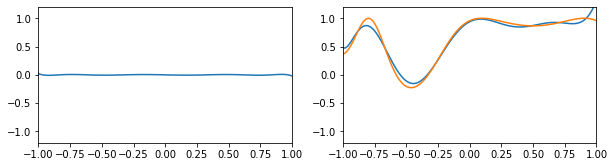

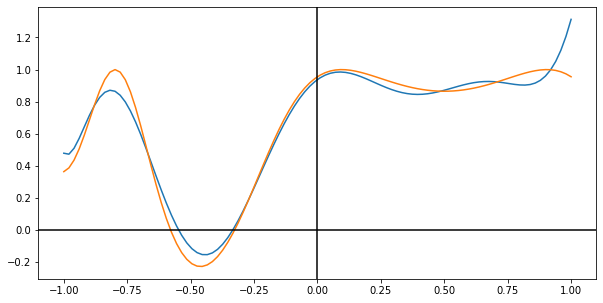

In [399]:
resolution = 100 #采样数
funcBasis1 = partial(funcBasis, resolution, 0.01) 
basisCount = 10

basisFunctions = [partial(funcBasisP, i) for i in range(basisCount)]
renormalizeTerms = [
    1/FuncInnerProduct(basisFunctions[x], basisFunctions[x], -1, 1, resolution) for x in range(basisCount)]

coeffs, samplePoints, originFuncSample, basisSamples, products = Project(
    MyFunc, basisFunctions, resolution=resolution)

y = Rebuild(coeffs,  basisFunctions, resolution,
            normalizeTerm=renormalizeTerms)


def PlotRebuildAnimation(ax1, ax2, frame):
    ax1.clear()
    ax2.clear()
    ax1.set_xlim(-1, 1)
    ax1.set_ylim(-1.2, 1.2)
    ax2.set_xlim(-1, 1)
    ax2.set_ylim(-1.2, 1.2)
    y = Rebuild(coeffs,  basisFunctions, resolution,
                normalizeTerm=renormalizeTerms, steps=frame)

    samplePoints = np.linspace(-1, 1, resolution)
    basisValues = SampleFunc(basisFunctions[frame], samplePoints)
    ax1.plot(samplePoints, np.array(basisValues)*coeffs[frame])
    ax2.plot(samplePoints, y)
    ax2.plot(samplePoints, SampleFunc(MyFunc, samplePoints))


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((10, 2.5))

anim_created = FuncAnimation(fig, partial(
    PlotRebuildAnimation, ax1, ax2), frames=basisCount, interval=1000)
anim_created.save("Images/rebuild.gif")
